In [1]:
#aim: To identify and remove seasonality of the given time series data

#Seasonal adjustment: Removing sasonality from the data ince it has been identified is called Seasonal adjustment


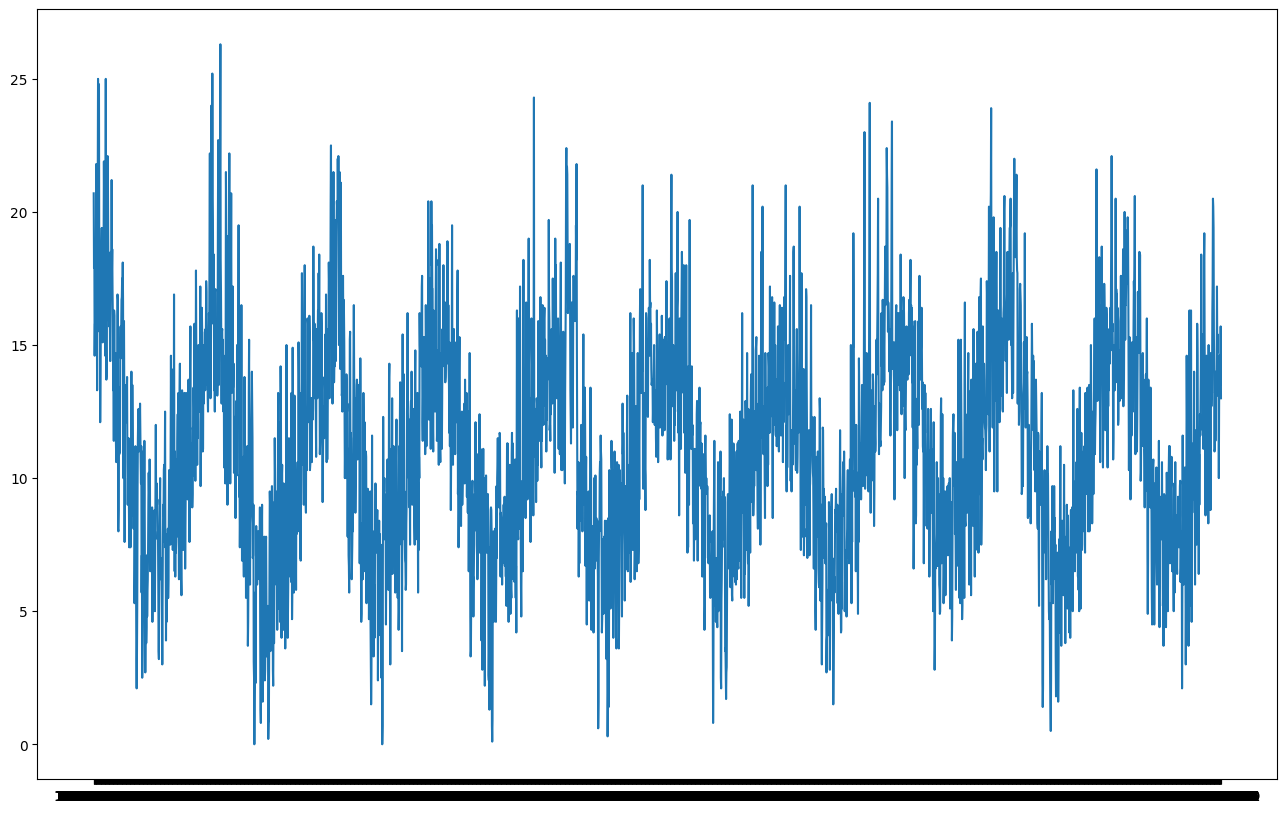

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
series = pd.read_csv('dailymintemps.csv',header=0,index_col=0)
plt.figure(figsize=(16,10))
plt.plot(series)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

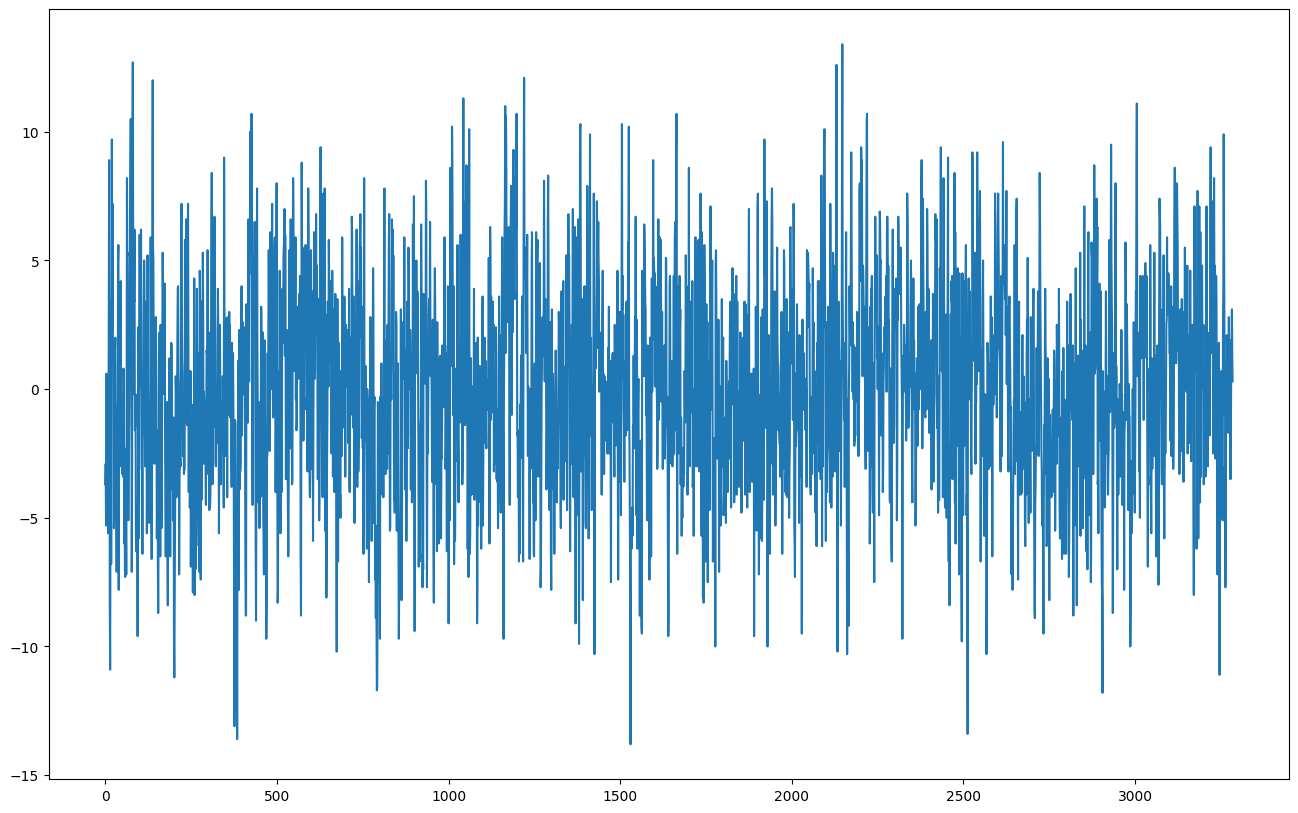

In [5]:
#Seasonal Adjustment using differencing: If the given data has seasonality, one way to remove it is by directly subtracting it from the data

X = series.values
diff = list()
days = 365
for i in range(days,len(X)):
    value = X[i]-X[i-days]  #subtracting the current day with the same day but last year
    diff.append(value)
plt.figure(figsize=(16,10))
plt.plot(diff)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

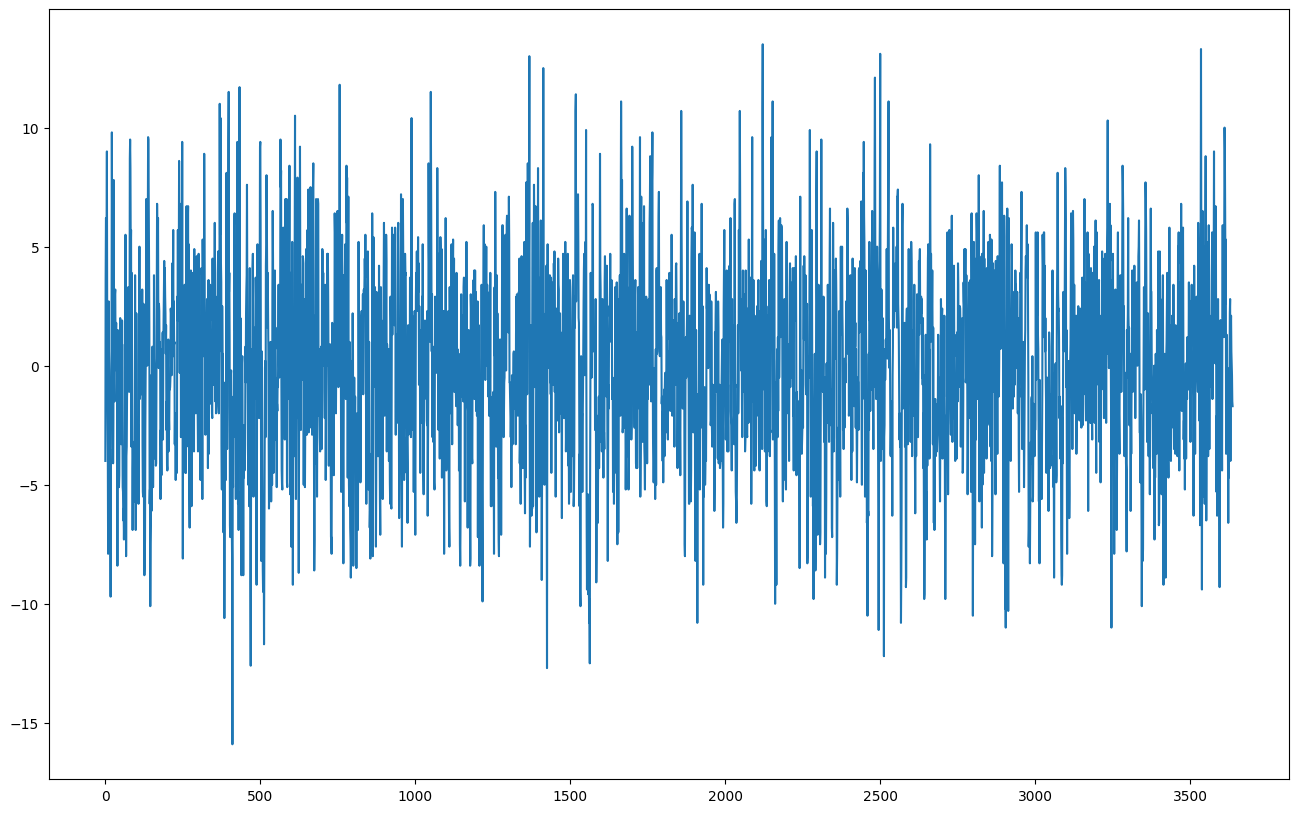

In [7]:
X = series.values
diff = list()
months = 12
for i in range(months,len(X)):
    value = X[i]-X[i-months]
    diff.append(value)
plt.figure(figsize=(16,10))
plt.plot(diff)

plt.show

In [15]:
#Seasonal adjustment with modeling(Polyfit)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
series = pd.read_csv('daily-min-temperatures.csv',header=0,index_col=0)
X = [i%365 for i in range(0,len(series))]
y = series.values
degree = 4
coef = np.polyfit(X,y,degree)
print("Coefficients:",coef)

Coefficients: [[-1.17308000e-08]
 [ 9.30253946e-06]
 [-2.15977594e-03]
 [ 1.19147966e-01]
 [ 1.38980178e+01]]


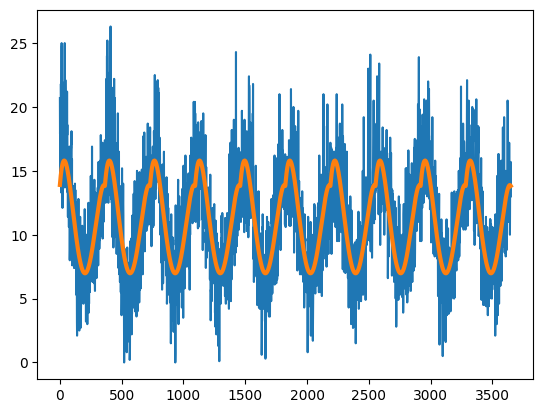

In [19]:
curve = list()
for i in range(len(X)):
    value = coef[-1]
    for d in range(degree):
        value = value + X[i]**(degree-d)*coef[d]
    curve.append(value)
plt.plot(y)
plt.plot(curve, linewidth=3)
plt.show()